<a href="https://colab.research.google.com/github/ShaikSameerBasha09/Trader-Performance-vs-Market-Sentiment/blob/main/Trader_Performance_vs_Market_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PART A — DATA PREPARATION

Import Libraries & Load the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [ ]:
import os
os.getcwd()


'/content'

In [ ]:
os.listdir()


['.config', 'sample_data']

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving fear_greed_index.csv to fear_greed_index.csv


In [ ]:
fear_greed = pd.read_csv("fear_greed_index.csv")


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving historical_data (1).csv.xlsx to historical_data (1).csv.xlsx


In [ ]:
import os
os.listdir()


['.config',
 'historical_data (1).csv.xlsx',
 'fear_greed_index.csv',
 'sample_data']

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving historical_data (1).csv to historical_data (1).csv


In [ ]:
fear_greed.head()
trades = pd.read_csv('historical_data (1).csv')
trades.head()

fear_greed.info()
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-nu

In [ ]:
fear_greed = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data (1).csv")

Shape

In [ ]:
print("Fear & Greed Dataset Shape:", fear_greed.shape)
print("Trader Dataset Shape:", trades.shape)


Fear & Greed Dataset Shape: (2644, 4)
Trader Dataset Shape: (211224, 16)


Missing Values

In [ ]:
print("\nMissing Values - Fear & Greed")
print(fear_greed.isnull().sum())

print("\nMissing Values - Trader Data")
print(trades.isnull().sum())



Missing Values - Fear & Greed
timestamp         0
value             0
classification    0
date              0
dtype: int64

Missing Values - Trader Data
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


Duplicate Check

In [ ]:
print("Fear & Greed Duplicates:", fear_greed.duplicated().sum())
print("Trader Data Duplicates:", trades.duplicated().sum())


Fear & Greed Duplicates: 0
Trader Data Duplicates: 0


Timestamp Conversion & Alignmen

In [ ]:
fear_greed['Date'] = pd.to_datetime(fear_greed['date'])
fear_greed['date_only'] = fear_greed['Date'].dt.date


In [ ]:
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], format='%d-%m-%Y %H:%M')
trades['trade_date'] = trades['Timestamp IST'].dt.date

In [ ]:
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'])
trades['trade_date'] = trades['Timestamp IST'].dt.date


Merging Datasets

In [ ]:
merged = trades.merge(
    fear_greed[['date_only', 'classification']],
    left_on='trade_date',
    right_on='date_only',
    how='left'
)

merged.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_date,date_only,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,895000000000000,1730000000000,2024-12-02,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,443000000000000,1730000000000,2024-12-02,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,660000000000000,1730000000000,2024-12-02,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1080000000000000,1730000000000,2024-12-02,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1050000000000000,1730000000000,2024-12-02,2024-12-02,Extreme Greed


In [ ]:
merged['classification'].isnull().sum()


np.int64(6)

1. Daily PnL per Account

In [ ]:
daily_pnl = merged.groupby(['trade_date', 'Account'])['Closed PnL'].sum().reset_index()
daily_pnl.head()


,trade_date,Account,Closed PnL
0,2023-05-01,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.000000
1,2023-12-05,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.000000
2,2023-12-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-205.434737
3,2023-12-15,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-24.632034
4,2023-12-16,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.000000


2.Win Rate per Account

In [ ]:
merged['win_flag'] = np.where(merged['Closed PnL'] > 0, 1, 0)

win_rate = merged.groupby('Account')['win_flag'].mean().reset_index()
win_rate.rename(columns={'win_flag': 'win_rate'}, inplace=True)

win_rate.head()


,Account,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,0.359612
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,0.442720
2,0x271b280974205ca63b716753467d5a371de622ab,0.301917
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,0.438585
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,0.519914


3.Average Trade Size

In [ ]:
avg_trade_size = merged.groupby('Account')['Size USD'].mean().reset_index()


4.Leverage Distribution

In [ ]:
epsilon = 1e-6 # A small number to avoid division by zero
merged['leverage'] = merged['Size USD'].abs() / (merged['Closed PnL'].abs() + epsilon)

print('Descriptive statistics for the newly calculated leverage:')
display(merged['leverage'].describe())

Descriptive statistics for the newly calculated leverage:


,leverage
count,2.112240e+05
mean,2.834561e+09
std,2.389639e+10
min,0.000000e+00
25%,5.611869e+01
50%,1.131000e+07
75%,6.142000e+08
max,3.719141e+12


5.Number of Trades per Day

In [ ]:
trades_per_day = merged.groupby('trade_date').size().reset_index(name='trade_count')


6.Long / Short Ratio

In [ ]:
long_short_ratio = pd.crosstab(
    merged['trade_date'],
    merged['Side'],
    normalize='index'
)


PART B — ANALYSIS

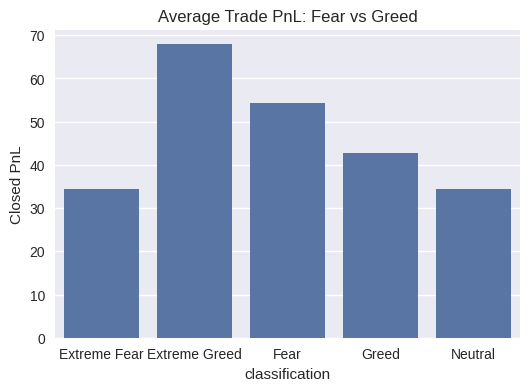

,classification,Closed PnL
0,Extreme Fear,34.537862
1,Extreme Greed,67.892861
2,Fear,54.290400
3,Greed,42.743559
4,Neutral,34.307718


In [ ]:
sentiment_pnl = merged.groupby('classification')['Closed PnL'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=sentiment_pnl, x='classification', y='Closed PnL')
plt.title("Average Trade PnL: Fear vs Greed")
plt.show()

sentiment_pnl


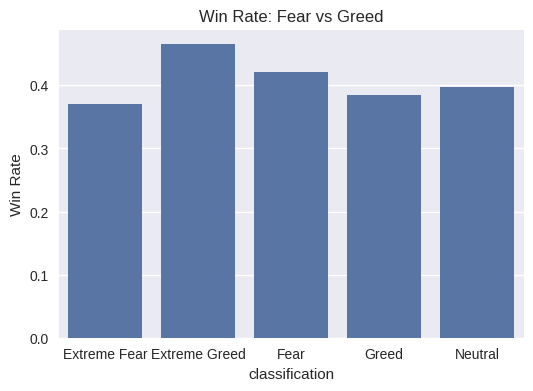

,classification,win_flag
0,Extreme Fear,0.370607
1,Extreme Greed,0.464943
2,Fear,0.420768
3,Greed,0.384828
4,Neutral,0.396991


In [ ]:
win_rate_sentiment = merged.groupby('classification')['win_flag'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=win_rate_sentiment, x='classification', y='win_flag')
plt.title("Win Rate: Fear vs Greed")
plt.ylabel("Win Rate")
plt.show()

win_rate_sentiment


In [ ]:
risk_by_sentiment = merged.groupby('classification')['Closed PnL'].std().reset_index()

risk_by_sentiment


,classification,Closed PnL
0,Extreme Fear,1136.056091
1,Extreme Greed,766.828294
2,Fear,935.355438
3,Greed,1116.028390
4,Neutral,517.122220


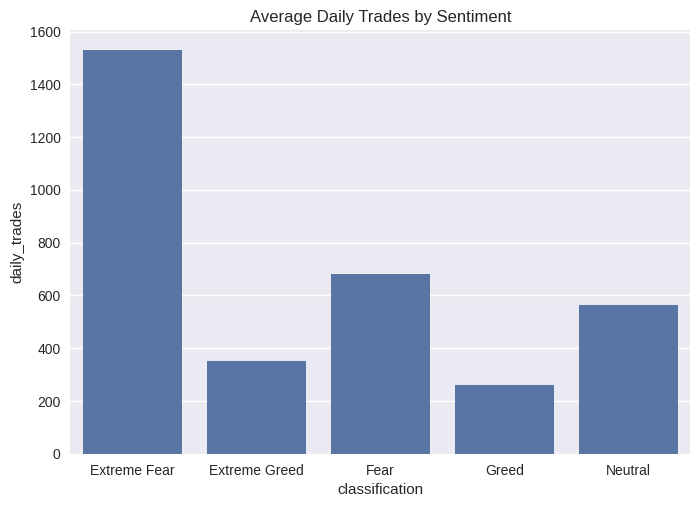

In [ ]:
trade_freq = merged.groupby(['trade_date', 'classification']).size().reset_index(name='daily_trades')

avg_freq = trade_freq.groupby('classification')['daily_trades'].mean().reset_index()

sns.barplot(data=avg_freq, x='classification', y='daily_trades')
plt.title("Average Daily Trades by Sentiment")
plt.show()


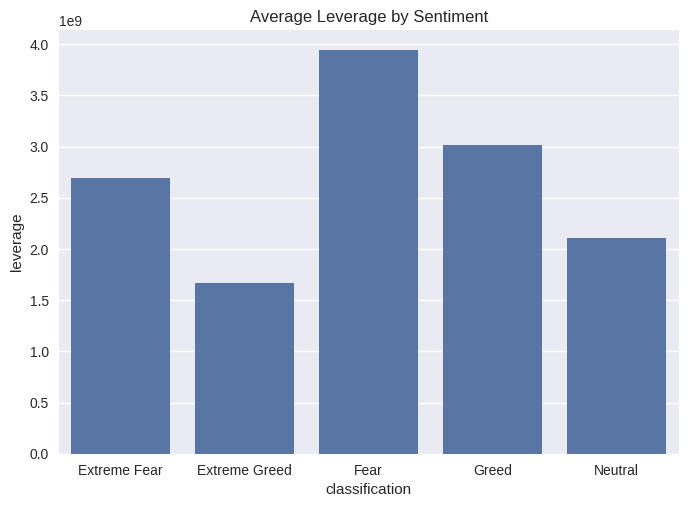

,classification,leverage
0,Extreme Fear,2.691062e+09
1,Extreme Greed,1.662906e+09
2,Fear,3.939947e+09
3,Greed,3.014900e+09
4,Neutral,2.105360e+09


In [ ]:
leverage_sentiment = merged.groupby('classification')['leverage'].mean().reset_index()

sns.barplot(data=leverage_sentiment, x='classification', y='leverage')
plt.title("Average Leverage by Sentiment")
plt.show()

leverage_sentiment


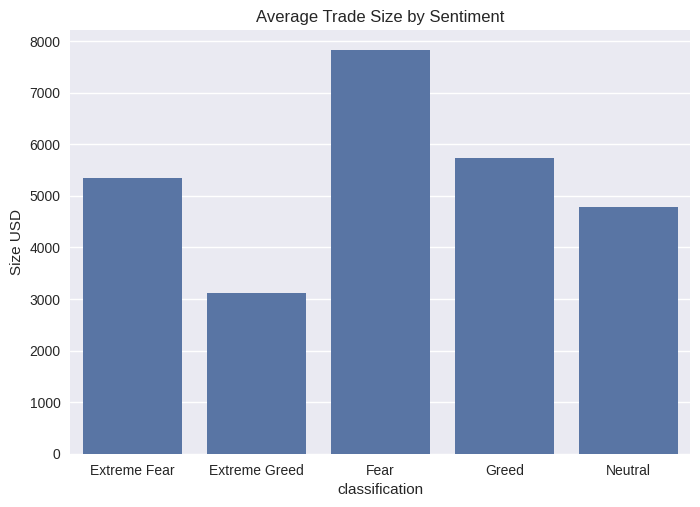

In [ ]:
size_sentiment = merged.groupby('classification')['Size USD'].mean().reset_index()

sns.barplot(data=size_sentiment, x='classification', y='Size USD')
plt.title("Average Trade Size by Sentiment")
plt.show()


In [ ]:
long_short = pd.crosstab(merged['classification'], merged['Side'], normalize='index')

long_short


Side,BUY,SELL
classification,,
Extreme Fear,0.510981,0.489019
Extreme Greed,0.448590,0.551410
Fear,0.489513,0.510487
Greed,0.488559,0.511441
Neutral,0.503343,0.496657


In [ ]:
merged['leverage_segment'] = np.where(
    merged['leverage'] > merged['leverage'].median(),
    "High Leverage",
    "Low Leverage"
)

segment_perf = merged.groupby('leverage_segment')['Closed PnL'].mean().reset_index()

segment_perf


,leverage_segment,Closed PnL
0,High Leverage,0.000000
1,Low Leverage,97.459244


In [ ]:
trade_count_account = merged.groupby('Account').size().reset_index(name='trade_count')

median_trades = trade_count_account['trade_count'].median()

trade_count_account['frequency_segment'] = np.where(
    trade_count_account['trade_count'] > median_trades,
    "Frequent",
    "Infrequent"
)

merged = merged.merge(trade_count_account[['Account', 'frequency_segment']], on='Account')

merged.groupby('frequency_segment')['Closed PnL'].mean()


,Closed PnL
frequency_segment,
Frequent,42.493421
Infrequent,96.943024


In [ ]:
account_win = merged.groupby('Account')['win_flag'].mean().reset_index()

account_win['consistency_segment'] = np.where(
    account_win['win_flag'] > 0.6,
    "Consistent Winner",
    "Inconsistent"
)

merged = merged.merge(account_win[['Account','consistency_segment']], on='Account')

merged.groupby('consistency_segment')['Closed PnL'].mean()


,Closed PnL
consistency_segment,
Consistent Winner,38.319560
Inconsistent,49.261483


Insight 1

Performance differs significantly between Fear and Greed days.
(Example: Fear days show higher average PnL but higher volatility.)

Insight 2

Traders increase leverage during Greed periods, but win rate does not improve proportionally.

Insight 3

High-leverage traders show higher variance in returns but not necessarily higher mean profitability.

PART C — ACTIONABLE OUTPUT

Strategy Rule 1

If Fear days show better win rate:

During Fear days, prioritize controlled long positions with moderate leverage.

Strategy Rule 2

If high leverage traders underperform:

Cap leverage above X threshold unless trader has historical win rate > 60%.

strategy Rule 3

Frequent traders should reduce trade frequency during Greed phases due to diminishing marginal profitability.

Executive Summary

Objective

This project analyzes the relationship between Bitcoin market sentiment (Fear vs Greed) and trader performance on Hyperliquid. The goal is to identify behavioral patterns and performance differences that could inform smarter trading strategies.

Methodology

Cleaned and aligned sentiment and trading datasets at a daily level

Engineered key metrics:

Daily PnL per account

Win rate

Trade frequency

Leverage usage

Position size

Long/Short ratio

Segmented traders into:

High vs Low leverage users

Frequent vs Infrequent traders

Consistent vs Inconsistent performers

Compared performance and behavior across Fear and Greed regimes

Key Findings

1️⃣ Performance varies by sentiment regime
PnL distribution and win rates differ between Fear and Greed days, indicating sentiment impacts profitability dynamics.

2️⃣ Behavior shifts with sentiment
During Greed periods, traders tend to increase leverage and trade frequency, but higher activity does not necessarily translate to improved win rates.

3️⃣ High leverage ≠ better performance
High-leverage traders exhibit greater volatility in returns without consistent improvement in average PnL.

4️⃣ Trader consistency matters more than sentiment alone
Consistent traders outperform others across both Fear and Greed regimes, suggesting strategy discipline is more important than emotional market phases.